In [1445]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import winsorize

In [1446]:
df_all_genres = pd.read_csv('../../data/raw_data/all_genres_playlists.csv')
df = df_all_genres

In [1447]:
df.head()

,track_id,playlist_url,playlist_name,track_name,track_popularity,artist_name,album,album_cover,artist_genres,artist_popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,4Gia17DzXBhYFbYiJj6SyW,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Working Man,51,Otis Rush,Mourning In The Morning,https://i.scdn.co/image/ab67616d0000b273fea221...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0436,0.492,0.000418,0.204,0.841,103.355,147800,4,blues
1,1BjYNhg7JhVfQdxqEThBwn,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Long Way Home,38,"Clarence ""Gatemouth"" Brown",Long Way Home,https://i.scdn.co/image/ab67616d0000b2730e1f13...,"['blues', 'blues rock', 'memphis blues', 'mode...",33,...,0,0.0380,0.910,0.048000,0.120,0.425,78.033,338333,4,blues
2,2Cg3GUkhjX96nO4p2WRlIa,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,She's A Sweet One,49,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",https://i.scdn.co/image/ab67616d0000b27399b18c...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0542,0.150,0.026500,0.202,0.713,122.863,181786,4,blues
3,5bC6ONDsL88snGN6QasjZH,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Help Me,59,Sonny Boy Williamson II,More Real Folk Blues,https://i.scdn.co/image/ab67616d0000b273b48c81...,"['acoustic blues', 'blues', 'blues rock', 'chi...",46,...,0,0.0430,0.597,0.021300,0.610,0.771,114.216,188200,4,blues
4,2TKykeHeVKsBqZC8M3SKcN,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Take Out Some Insurance,51,Jimmy Reed,Rockin' With Reed,https://i.scdn.co/image/ab67616d0000b2739b7573...,"['blues', 'blues rock', 'chicago blues', 'elec...",42,...,1,0.0513,0.663,0.000000,0.122,0.566,111.330,143332,4,blues


In [1448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13338 entries, 0 to 13337
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           13338 non-null  object 
 1   playlist_url       13338 non-null  object 
 2   playlist_name      13338 non-null  object 
 3   track_name         13338 non-null  object 
 4   track_popularity   13338 non-null  int64  
 5   artist_name        13338 non-null  object 
 6   album              13338 non-null  object 
 7   album_cover        13337 non-null  object 
 8   artist_genres      13338 non-null  object 
 9   artist_popularity  13338 non-null  int64  
 10  danceability       13338 non-null  float64
 11  energy             13338 non-null  float64
 12  key                13338 non-null  int64  
 13  loudness           13338 non-null  float64
 14  mode               13338 non-null  int64  
 15  speechiness        13338 non-null  float64
 16  acousticness       133

In [1449]:
df.describe()

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,1.333800e+04,13338.000000
mean,49.878318,52.054431,0.596784,0.596505,5.378917,-9.642331,0.618084,0.078349,0.305373,0.175183,0.174161,0.531881,118.693940,2.515780e+05,3.917379
std,17.401072,15.623505,0.186877,0.264655,3.551810,5.942350,0.485874,0.074089,0.339877,0.317552,0.141460,0.266934,29.006995,9.360876e+04,0.358380
min,0.000000,0.000000,0.000000,0.000885,0.000000,-47.001000,0.000000,0.000000,0.000000,0.000000,0.014500,0.000000,0.000000,3.033300e+04,0.000000
25%,39.000000,43.000000,0.479000,0.434000,2.000000,-11.690750,0.000000,0.036700,0.022100,0.000000,0.089700,0.316250,96.012250,1.941268e+05,4.000000
50%,51.000000,53.000000,0.620000,0.645500,6.000000,-7.937000,1.000000,0.048100,0.149000,0.000353,0.118000,0.548000,119.315500,2.297135e+05,4.000000
75%,62.000000,63.000000,0.740000,0.809000,9.000000,-5.658000,1.000000,0.082000,0.544750,0.140000,0.214000,0.755000,134.561000,2.822752e+05,4.000000
max,98.000000,100.000000,0.984000,1.000000,11.000000,1.342000,1.000000,0.827000,0.996000,0.983000,0.984000,0.992000,217.683000,1.430840e+06,5.000000


In [1450]:
# We drop the unnecessary columns for this project
df.drop(['album_cover', 'track_id', 'playlist_url', 'playlist_name'], axis=1, inplace=True)

In [1451]:
# # Some of the and albums of the tracks have extra information added after a '-' or in between '()'
df['album'] = df['album'].str.split('(').str[0]
df['album'] = df['album'].str.split('-').str[0]

In [1452]:
df['genre'].value_counts()

electronic    1725
pop           1251
rock          1134
country       1083
reggae        1038
blues         1034
latin         1028
hiphop        1024
disco         1016
metal         1013
jazz          1002
classical      990
Name: genre, dtype: int64

In [1453]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df["artist_encoded"] = le.fit_transform(df["artist_name"])
df["album_encoded"] = le.fit_transform(df["album"])

genre_encoded_dict = {'blues' : 1,
                 'classical' : 2,
                 'country' : 3,
                 'disco' : 4,
                 'electronic' : 5,
                 'hiphop' : 6,
                 'metal' : 7,
                 'jazz' : 8,
                 'pop' : 9,
                 'reggae' : 10,
                 'rock' : 11,
                 'latin' : 12}

df.genre = df.genre.map(genre_encoded_dict)

<AxesSubplot:xlabel='artist_popularity'>

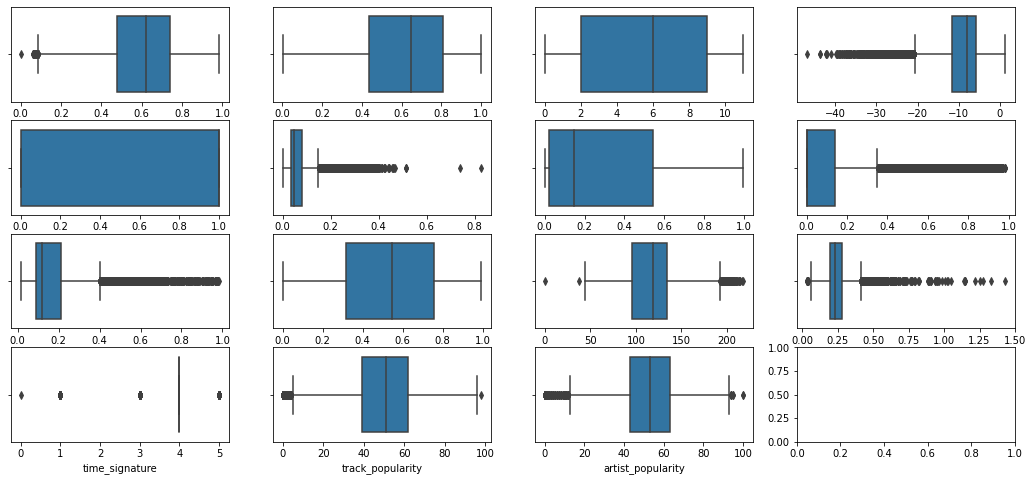

In [1454]:
fig, axes = plt.subplots(4, 4, figsize=(18, 8))
 
sns.boxplot(ax=axes[0, 0], x = df['danceability'])
sns.boxplot(ax=axes[0, 1], x = df['energy'])
sns.boxplot(ax=axes[0, 2], x = df['key'])
sns.boxplot(ax=axes[0, 3], x = df['loudness'])
sns.boxplot(ax=axes[1, 0], x = df['mode'])
sns.boxplot(ax=axes[1, 1], x = df['speechiness'])
sns.boxplot(ax=axes[1, 2], x = df['acousticness'])
sns.boxplot(ax=axes[1, 3], x = df['instrumentalness'])
sns.boxplot(ax=axes[2, 0], x = df['liveness'])
sns.boxplot(ax=axes[2, 1], x = df['valence'])
sns.boxplot(ax=axes[2, 2], x = df['tempo'])
sns.boxplot(ax=axes[2, 3], x = df['duration_ms'])
sns.boxplot(ax=axes[3, 0], x = df['time_signature'])
sns.boxplot(ax=axes[3, 1], x = df['track_popularity'])
sns.boxplot(ax=axes[3, 2], x = df['artist_popularity'])

In [1455]:
df['danceability'] = winsorize(df.danceability, (0.005, 0))
df['loudness'] = winsorize(df.loudness, (0.0011, 0))
df['speechiness'] = winsorize(df.speechiness, (0, 0.123))
df['tempo'] = winsorize(df.tempo, (0.0002, 0))

<AxesSubplot:>

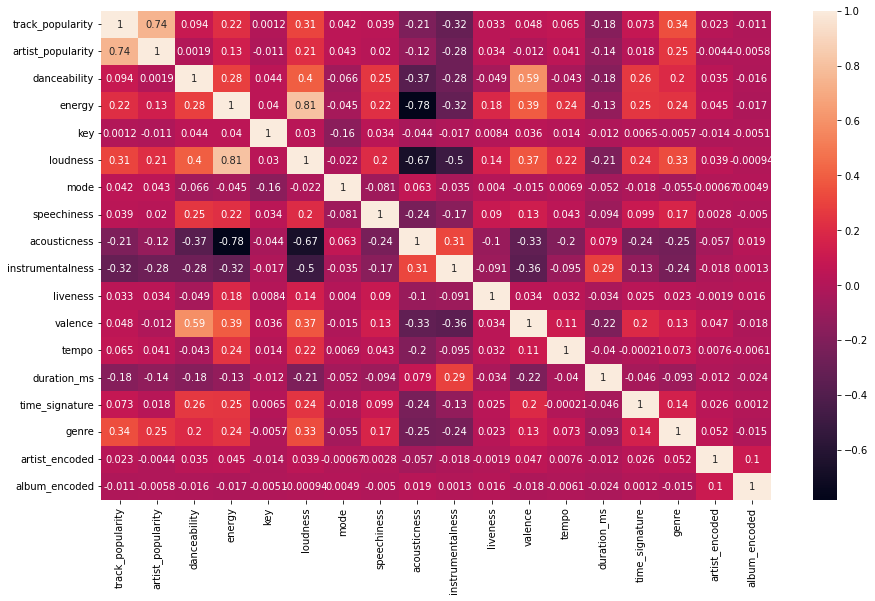

In [1456]:
plt.figure(figsize =(15, 9))
sns.heatmap(df.corr(), annot=True)

In [1457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13338 entries, 0 to 13337
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         13338 non-null  object 
 1   track_popularity   13338 non-null  int64  
 2   artist_name        13338 non-null  object 
 3   album              13338 non-null  object 
 4   artist_genres      13338 non-null  object 
 5   artist_popularity  13338 non-null  int64  
 6   danceability       13338 non-null  float64
 7   energy             13338 non-null  float64
 8   key                13338 non-null  int64  
 9   loudness           13338 non-null  float64
 10  mode               13338 non-null  int64  
 11  speechiness        13338 non-null  float64
 12  acousticness       13338 non-null  float64
 13  instrumentalness   13338 non-null  float64
 14  liveness           13338 non-null  float64
 15  valence            13338 non-null  float64
 16  tempo              133

In [1458]:
df.to_csv('../../data/clean_data/clean01.csv', index=False)

In [1459]:
df2 = df.copy()

df2['duration_ms'] = (df['duration_ms']) / (max(df['duration_ms']))
df2['loudness'] = (df['loudness'] - min(df['loudness'])) / (max(df['loudness'])-min(df['loudness']))
df2['tempo'] = (df['tempo'])/(max(df['tempo'])-min(df['tempo']))
df2['key'] = (df['key'])/(max(df['key'])-min(df['key']))

In [1460]:
df2.describe()

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,artist_encoded,album_encoded
count,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000,13338.000000
mean,49.878318,52.054431,0.596862,0.596505,0.488992,0.727726,0.618084,0.066242,0.305373,0.175183,0.174161,0.531881,0.686416,0.175825,3.917379,6.496626,2793.555031,5245.476458
std,17.401072,15.623505,0.186661,0.264655,0.322892,0.147008,0.485874,0.041175,0.339877,0.317552,0.141460,0.266934,0.167671,0.065422,0.358380,3.377949,1631.844401,3030.079473
min,0.000000,0.000000,0.089600,0.000885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014500,0.000000,0.258836,0.021199,0.000000,1.000000,0.000000,0.000000
25%,39.000000,43.000000,0.479000,0.434000,0.181818,0.676879,0.000000,0.036700,0.022100,0.000000,0.089700,0.316250,0.555228,0.135673,4.000000,4.000000,1379.000000,2610.250000
50%,51.000000,53.000000,0.620000,0.645500,0.545455,0.769946,1.000000,0.048100,0.149000,0.000353,0.118000,0.548000,0.689988,0.160545,4.000000,6.000000,2758.500000,5270.500000
75%,62.000000,63.000000,0.740000,0.809000,0.818182,0.826449,1.000000,0.082000,0.544750,0.140000,0.214000,0.755000,0.778151,0.197279,4.000000,9.000000,4196.000000,7894.750000
max,98.000000,100.000000,0.984000,1.000000,1.000000,1.000000,1.000000,0.153000,0.996000,0.983000,0.984000,0.992000,1.258836,1.000000,5.000000,12.000000,5664.000000,10472.000000


In [1461]:
df2.to_csv('../../data/clean_data/clean02.csv', index=False)

In [1462]:
df3 = df.copy()

df3['artist_popularity'] = np.log1p(df.artist_popularity)
df3['track_popularity'] = np.log1p(df.track_popularity)
df3['key'] = np.log1p(df.key)
df3['tempo'] = np.log1p(df.tempo)
df3['duration_ms'] = np.log1p(df.duration_ms)
df3['time_signature'] = np.log1p(df.time_signature)
df3['artist_encoded'] = np.log1p(df.artist_encoded)
df3['album_encoded'] = np.log1p(df.album_encoded)

In [1463]:
df3.to_csv('../../data/clean_data/clean03.csv', index=False)

In [1464]:
df4 = df.copy()

In [1465]:
df4["genre"] = np.where(df4["genre"] == "country", 'rock', df4["genre"])
df4["genre"] = np.where(df4["genre"] == "disco", 'pop', df4["genre"])
df4["genre"] = np.where(df4["genre"] == "hiphop", 'urban', df4["genre"])
df4["genre"] = np.where(df4["genre"] == "reggae", 'urban', df4["genre"])

In [1466]:
df4['artist_popularity'] = np.log1p(df.artist_popularity)
df4['track_popularity'] = np.log1p(df.track_popularity)
df4['key'] = np.log1p(df.key)
df4['tempo'] = np.log1p(df.tempo)
df4['duration_ms'] = np.log1p(df.duration_ms)
df4['time_signature'] = np.log1p(df.time_signature)
df4['artist_encoded'] = np.log1p(df.artist_encoded)
df4['album_encoded'] = np.log1p(df.album_encoded)

In [1467]:
df4.to_csv('../../data/clean_data/clean04.csv', index=False)

In [1468]:
df5 = df.copy()

In [1469]:
df5 = df4.drop(df4[df4.genre == 'latin'].index)

In [1470]:
df5['artist_popularity'] = np.log1p(df.artist_popularity)
df5['track_popularity'] = np.log1p(df.track_popularity)
df5['key'] = np.log1p(df.key)
df5['tempo'] = np.log1p(df.tempo)
df5['duration_ms'] = np.log1p(df.duration_ms)
df5['time_signature'] = np.log1p(df.time_signature)
df5['artist_encoded'] = np.log1p(df.artist_encoded)
df5['album_encoded'] = np.log1p(df.album_encoded)

In [1471]:
df5.to_csv('../../data/clean_data/clean05.csv', index=False)

In [1472]:
df6 = df.copy()

In [1473]:
df6['artist_popularity'] = np.log1p(df6.artist_popularity)
df6['track_popularity'] = np.log1p(df6.track_popularity)
df6['key'] = np.log1p(df6.key)
df6['tempo'] = np.log1p(df6.tempo)
df6['duration_ms'] = np.log1p(df6.duration_ms)
df6['time_signature'] = np.log1p(df6.time_signature)
df6['artist_encoded'] = np.log1p(df6.artist_encoded)
df6['album_encoded'] = np.log1p(df6.album_encoded)
df6['loudness'] = (df6['loudness'] - min(df6['loudness'])) / (max(df6['loudness'])-min(df6['loudness']))

In [1474]:
df6.to_csv('../../data/clean_data/clean06.csv', index=False)

In [1475]:
df7 = df.copy()

In [1476]:
df7['artist_genre_blues']= np.where((df7['artist_genres'].str.contains('blues')),1,0)
df7['artist_genre_classical']= np.where((df7['artist_genres'].str.contains('classical')),1,0)
df7['artist_genre_disco']= np.where((df7['artist_genres'].str.contains('disco')),1,0)
df7['artist_genre_country']= np.where((df7['artist_genres'].str.contains('country')),1,0)
df7['artist_genre_electronic']= np.where((df7['artist_genres'].str.contains('electronic' or 'house' or 'techno')),1,0)
df7['artist_genre_hiphop']= np.where((df7['artist_genres'].str.contains('hip hop', 'rap')),1,0)
df7['artist_genre_metal']= np.where((df7['artist_genres'].str.contains('metal')),1,0)
df7['artist_genre_jazz']= np.where((df7['artist_genres'].str.contains('jazz')),1,0)
df7['artist_genre_pop']= np.where((df7['artist_genres'].str.contains('pop')),1,0)
df7['artist_genre_reggae']= np.where((df7['artist_genres'].str.contains('reggae')),1,0)
df7['artist_genre_rock']= np.where((df7['artist_genres'].str.contains('rock')),1,0)
df7['artist_genre_latin']= np.where((df7['artist_genres'].str.contains('latin')),1,0)

In [1477]:
df7['artist_popularity'] = np.log1p(df.artist_popularity)
df7['track_popularity'] = np.log1p(df.track_popularity)
df7['key'] = np.log1p(df.key)
df7['tempo'] = np.log1p(df.tempo)
df7['duration_ms'] = np.log1p(df.duration_ms)
df7['time_signature'] = np.log1p(df.time_signature)
df7['artist_encoded'] = np.log1p(df.artist_encoded)
df7['album_encoded'] = np.log1p(df.album_encoded)

<AxesSubplot:>

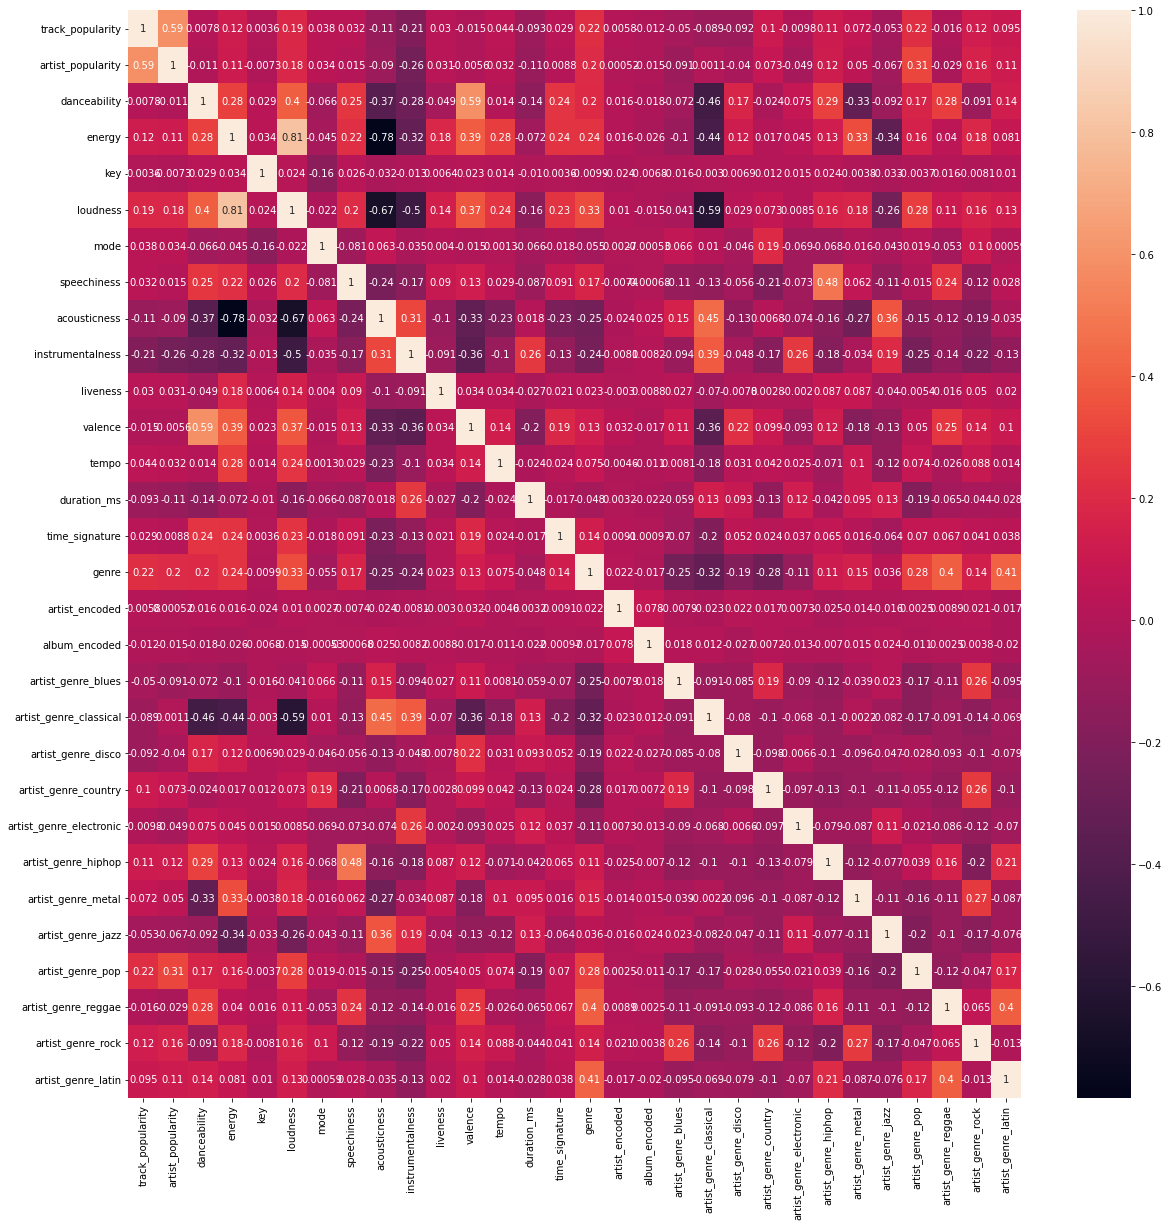

In [1478]:
plt.figure(figsize=(20,20))
sns.heatmap(df7.corr(), annot=True)

In [1479]:
df7.to_csv('../../data/clean_data/clean07.csv', index=False)

In [1533]:
df8 = df.copy()

In [1534]:
mask_blues = (df['genre'] == 1)
df8_blues = df[mask_blues].copy()

mask_classical = (df['genre'] == 2)
df8_classical = df[mask_classical].copy()

mask_country = (df['genre'] == 3)
df8_country = df[mask_country].copy()

mask_disco = (df['genre'] == 4)
df8_disco = df[mask_disco].copy()

mask_electronic = (df['genre'] == 5)
df8_electronic = df[mask_electronic].copy()

mask_hiphop = (df['genre'] == 6)
df8_hiphop = df[mask_hiphop].copy()

mask_metal = (df['genre'] == 7)
df8_metal = df[mask_metal].copy()

mask_jazz = (df['genre'] == 8)
df8_jazz = df[mask_jazz].copy()

mask_pop = (df['genre'] == 9)
df8_pop = df[mask_pop].copy()

mask_reggae = (df['genre'] == 10)
df8_reggae = df[mask_reggae].copy()

mask_rock = (df['genre'] == 11)
df8_rock = df[mask_rock].copy()

mask_latin = (df['genre'] == 12)
df8_latin = df[mask_latin].copy()

<AxesSubplot:xlabel='tempo'>

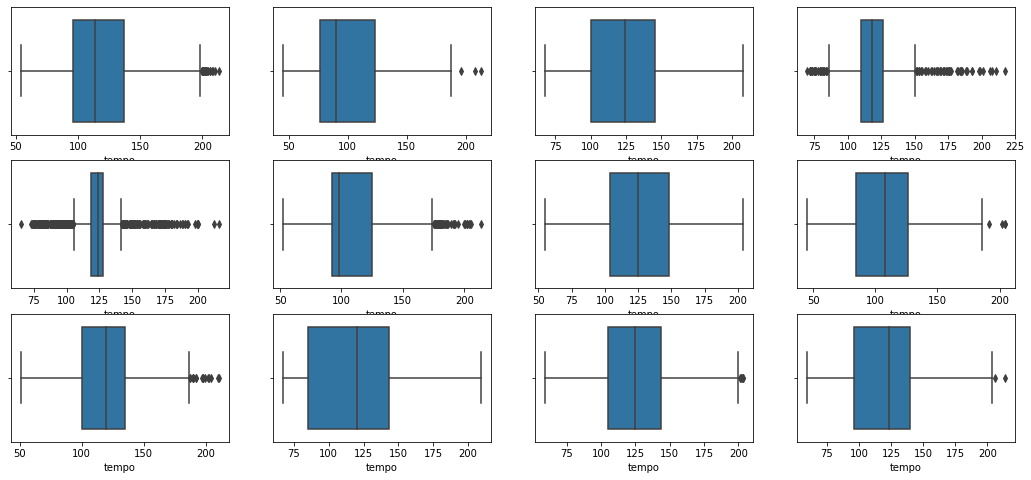

In [1535]:
fig, axes = plt.subplots(3, 4, figsize=(18, 8))
 
sns.boxplot(ax=axes[0, 0], x = df8_blues['tempo'])
sns.boxplot(ax=axes[0, 1], x = df8_classical['tempo'])
sns.boxplot(ax=axes[0, 2], x = df8_country['tempo'])
sns.boxplot(ax=axes[0, 3], x = df8_disco['tempo'])
sns.boxplot(ax=axes[1, 0], x = df8_electronic['tempo'])
sns.boxplot(ax=axes[1, 1], x = df8_hiphop['tempo'])
sns.boxplot(ax=axes[1, 2], x = df8_metal['tempo'])
sns.boxplot(ax=axes[1, 3], x = df8_jazz['tempo'])
sns.boxplot(ax=axes[2, 0], x = df8_pop['tempo'])
sns.boxplot(ax=axes[2, 1], x = df8_reggae['tempo'])
sns.boxplot(ax=axes[2, 2], x = df8_rock['tempo'])
sns.boxplot(ax=axes[2, 3], x = df8_latin['tempo'])


In [1536]:
df8_classical['tempo'] = winsorize(df8_classical.tempo, (0, 0.005))
df8_jazz['tempo'] = winsorize(df8_jazz.tempo, (0, 0.005))
df8_rock['tempo'] = winsorize(df8_rock.tempo, (0, 0.005))
df8_latin['tempo'] = winsorize(df8_latin.tempo, (0, 0.005))

In [1537]:
df8.to_csv('../../data/clean_data/clean08.csv', index=False)

In [1327]:
df9 = df8.copy()

In [1332]:
df9.to_csv('../../data/clean_data/clean09.csv', index=False)